In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv('./Data/DSPhongTro_DaXuLy.csv', sep='\t')
data.head()

,Địa chỉ,Diện tích,Số phòng ngủ,Số toilet,Nội thất,Mức giá,Ngày đăng tin
0,16,20.0,1.0,1.0,2,4.0,2024-10-22
1,16,60.0,2.0,2.0,0,10.0,2024-10-23
2,3,45.0,1.0,1.0,0,7.3,2024-10-23
3,2,30.0,1.0,1.0,2,4.1,2024-10-17
4,19,28.0,1.0,1.0,0,2.8,2024-10-23


In [3]:
mapping = {
    1: "Quận 1",
    2: "Quận 2",
    3: "Quận 3",
    4: "Quận 4",
    5: "Quận 5",
    6: "Quận 6",
    7: "Quận 7",
    8: "Quận 8",
    9: "Quận 9",
    10: "Quận 10",
    11: "Quận 11",
    12: "Quận 12",
    13: "Quận Bình Thạnh",
    14: "Quận Gò Vấp",    
    15: "Quận Phú Nhuận",  
    16: "Quận Tân Bình",   
    17: "Quận Tân Phú",   
    18: "Quận Bình Tân",   
    19: "Thành phố Thủ Đức", 
    20: "Huyện Bình Chánh", 
    21: "Huyện Cần Giờ",  
    22: "Huyện Củ Chi",   
    23: "Huyện Hóc Môn",  
    24: "Huyện Nhà Bè",   
}
mapping_noi_that = {0: "Không", 1: "Cơ bản", 2: "Đầy đủ", 3: "Cao cấp"}

In [4]:
data.dtypes

Địa chỉ            int64
Diện tích        float64
Số phòng ngủ     float64
Số toilet        float64
Nội thất           int64
Mức giá          float64
Ngày đăng tin     object
dtype: object

### Xu hướng thị trường

#### Câu hỏi 1: Ở những khu vực nào tập trung nhiều phòng trọ giá rẻ? Tỷ lệ phòng trọ giá rẻ so với tổng số phòng trọ ở mỗi khu vực đó như thế nào? Và phân bố giá của tất cả các phòng trọ ở các khu vực này ra sao?

##### Ý nghĩa của việc trả lời câu hỏi

- Câu hỏi này giúp chúng ta xác định được những khu vực có nhiều lựa chọn cho thuê phòng trọ giá rẻ, từ đó hỗ trợ người thuê nhà tìm kiếm các tùy chọn phù hợp với ngân sách của mình. Đồng thời, phân tích này cũng giúp các chủ nhà hiểu rõ hơn về sự cạnh tranh về giá cả ở từng khu vực.

##### Phân tích hướng xử lí

- Các bước thực hiện:
    + Xác định khái niệm "phòng trọ giá rẻ".
    + Tính toán tỷ lệ phòng trọ giá rẻ.
    + Phân tích phân bố giá.
    + Trực quan hóa kết quả.
- Kết quả mong đợi:
    + Xác định được các khu vực có nhiều phòng trọ giá rẻ và phân bố mức giá ở từng khu vực.

##### Tiền xử lí

In [5]:
data_Q1 = data.copy()

# Xác định mức giá rẻ ( dưới 3 triệu đồng/tháng)
gia_re = 3
data_Q1['La_phong_tro_gia_re'] = np.where(data_Q1['Mức giá'] <= gia_re, 1, 0)
data_Q1['Địa chỉ'] = data_Q1['Địa chỉ'].map(mapping)

ty_le_phong_tro_gia_re = data_Q1.groupby('Địa chỉ')['La_phong_tro_gia_re'].mean() * 100

##### Phân tích để trả lời câu hỏi

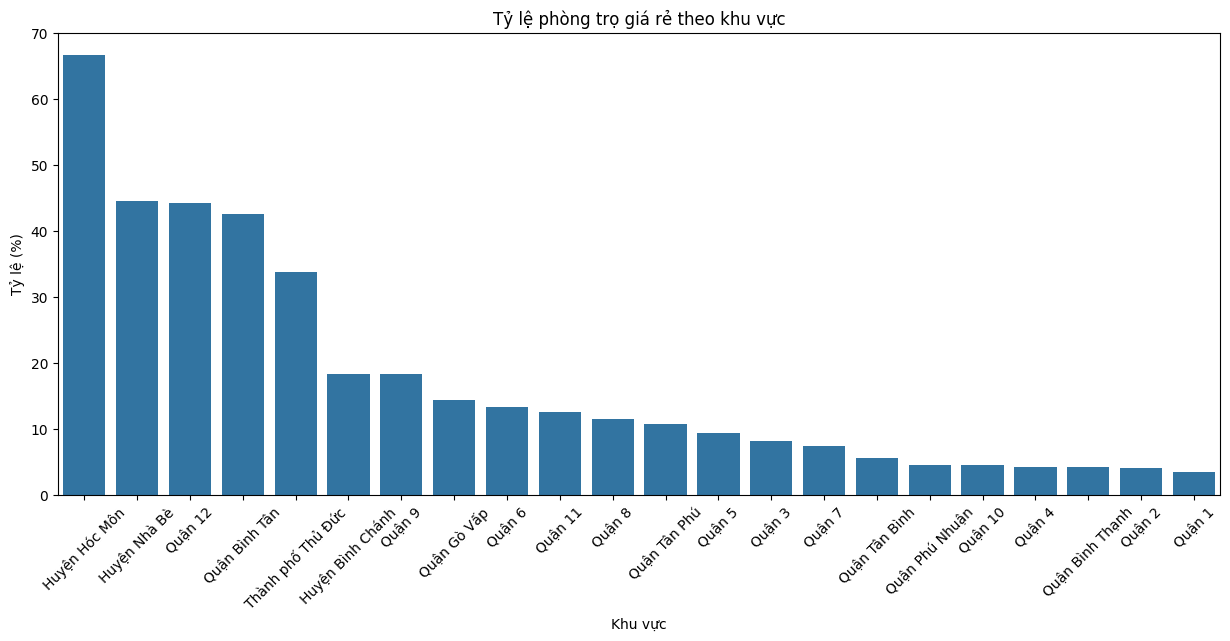

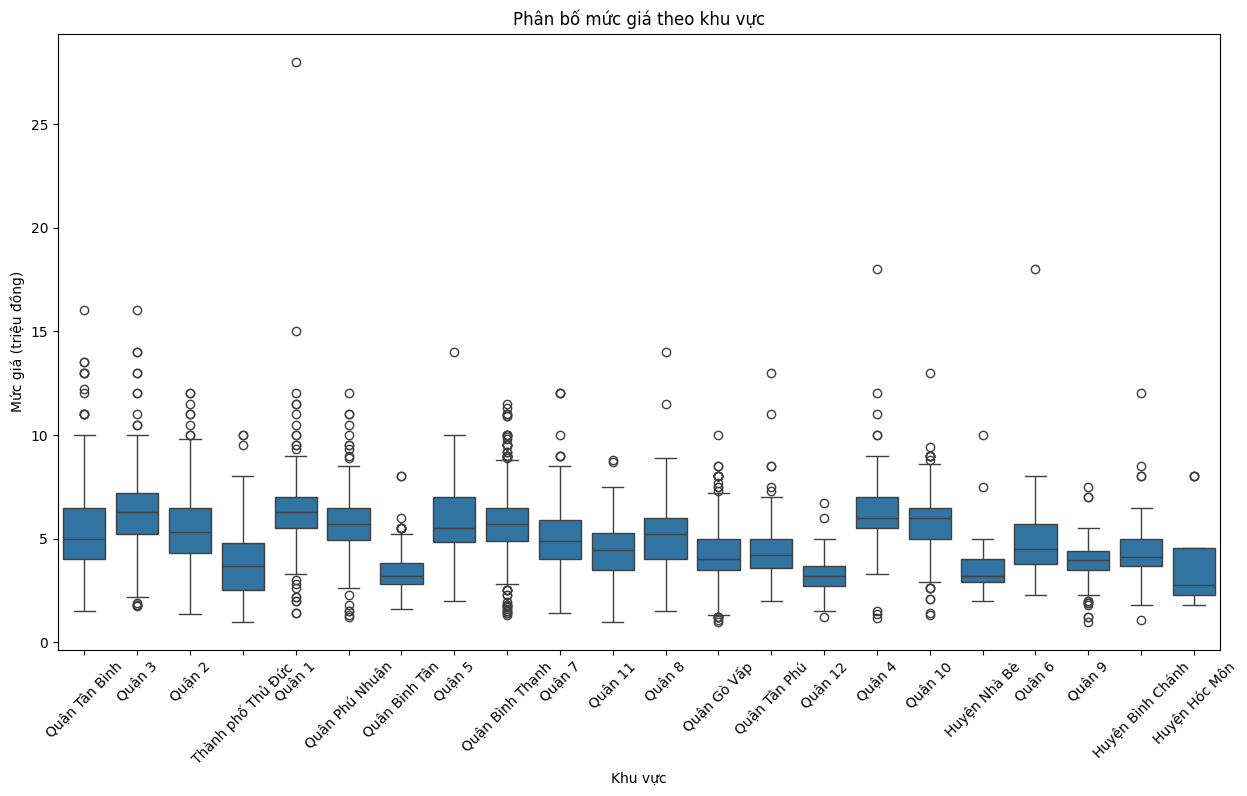

In [6]:
# Biểu đồ 1: Tỷ lệ phòng trọ giá rẻ theo khu vực
plt.figure(figsize=(15, 6))
ty_le_phong_tro_gia_re = ty_le_phong_tro_gia_re.sort_values(ascending=False)
sns.barplot(x=ty_le_phong_tro_gia_re.index, y=ty_le_phong_tro_gia_re.values)
plt.title("Tỷ lệ phòng trọ giá rẻ theo khu vực")
plt.xlabel("Khu vực")
plt.ylabel("Tỷ lệ (%)")
plt.xticks(rotation=45)
plt.show()

# Biểu đồ 2: Phân bố giá của tất cả các phòng trọ theo khu vực
plt.figure(figsize=(15, 8))
sns.boxplot(x='Địa chỉ', y='Mức giá', data=data_Q1)
plt.title("Phân bố mức giá theo khu vực")
plt.xlabel("Khu vực")
plt.ylabel("Mức giá (triệu đồng)")
plt.xticks(rotation=45)
plt.show()

Từ biều đồ chúng ta có thể thấy:
- Cho thấy rõ sự phân hóa về tỷ lệ phòng trọ giá rẻ giữa các khu vực.
- Các quận ngoại thành thường có tỷ lệ phòng trọ giá rẻ cao hơn so với các quận nội thành.
- Qua biểu đồ boxplot, chúng ta có thể thấy mức giá trung bình, khoảng biến thiên, giá trị ngoại lệ của giá thuê tại mỗi khu vực.

##### Kết luận:

- Xác định các khu vực có nhiều phòng trọ giá rẻ:
    + Các khu vực càng xa nội thành thì tỷ lệ phòng trọ giá rẻ càng cao: Hóc Môn, Nhà Bè, Quận 12, Bình Tân, Thủ Đức là những khu vực có tỷ lệ phòng trọ giá rẻ cao nhất. Điều này được thể hiện rõ ràng trên cả hai biểu đồ. Các khu vực này tập trung đông đảo người lao động phổ thông, công nhân các khu công nghiệp, sinh viên các trường đại học, cao đẳng ở xa trung tâm. Đây là nhóm người có thu nhập trung bình hoặc thấp, nhu cầu tìm kiếm phòng trọ giá rẻ là rất lớn.
    + Các khu vực nội thành: Quận 1, Quận Bình Thạnh, Quận 2 có tỷ lệ phòng trọ giá rẻ thấp nhất. Các quận này đã phát triển từ lâu, mật độ xây dựng rất cao, quỹ đất dành cho xây dựng nhà ở, đặc biệt là các khu nhà trọ bình dân, rất hạn chế. Điều này làm giảm nguồn cung phòng trọ giá rẻ, đẩy giá thuê lên cao.
- Phân bố giá cả:
    + Giá cả trung bình: Các khu vực ngoại thành TP HCM thường có mức giá trung bình thấp hơn so với các khu vực nội thành. Điều này được thể hiện rõ qua biểu đồ boxplot.
    + Có một số điểm dữ liệu nằm xa so với các điểm dữ liệu còn lại (outliers). Điều này cho thấy có một số phòng trọ có giá thuê rất cao hoặc rất thấp so với mặt bằng chung của khu vực. Các điểm dữ liệu ngoại lệ này có thể do nhiều nguyên nhân như: phòng trọ có vị trí đặc biệt đẹp, có tiện ích cao cấp, hoặc ngược lại, phòng trọ có chất lượng kém, vị trí không thuận lợi.
- Kết luận tổng quan:
    + Thị trường cho thuê phòng trọ tại Thành phố Hồ Chí Minh có sự phân hóa rõ rệt giữa các khu vực. Các khu vực ngoại thành thường có nhiều lựa chọn phòng trọ giá rẻ hơn so với các khu vực nội thành. Tuy nhiên, chất lượng và tiện ích của các phòng trọ này cũng có sự khác biệt.

#### Câu hỏi 2: Tỷ lệ phòng trọ diện tích nhỏ phân bố như thế nào ở từng khu vực? Mức giá trung bình của các phòng trọ diện tích nhỏ thay đổi ra sao giữa các khu vực và so với mức giá trung bình của các phòng trọ có diện tích lớn hơn trong cùng khu vực đó?

##### Ý nghĩa của việc trả lời câu hỏi

- Câu hỏi này giúp xác định khu vực nào tập trung nhiều phòng trọ diện tích nhỏ, từ đó hiểu rõ hơn về nhu cầu và nguồn cung loại hình phòng trọ này. Đồng thời, so sánh giá giữa phòng nhỏ và phòng lớn hơn trong cùng khu vực giúp người thuê có cái nhìn tổng quan về thị trường và chủ nhà có chiến lược giá phù hợp.

##### Phân tích hướng xử lí

- Các bước thực hiện:
    + Xác định khái niệm "phòng trọ diện tích nhỏ" (ví dụ: dưới 20m2).
    + Tính tỷ lệ phòng trọ diện tích nhỏ ở mỗi khu vực.
    + Tính mức giá trung bình của phòng trọ diện tích nhỏ và lớn hơn ở mỗi khu vực.
    + Trực quan hóa kết quả bằng biểu đồ.
- Kết quả mong đợi:
    + Xác định được các khu vực có nhiều phòng trọ diện tích nhỏ.
    + Xác định được sự chênh lệch mức giá trung bình của phòng trọ diện tích nhỏ và lớn hơn ở mỗi khu vực.

##### Tiền xử lí

In [10]:
data_Q2 = data.copy()
data_Q2['Địa chỉ'] = data_Q2['Địa chỉ'].map(mapping)

# Xác định phòng trọ diện tích nhỏ (ví dụ: dưới 20m2)
data_Q2['La_phong_tro_dien_tich_nho'] = (data_Q2['Diện tích'] < 20)

##### Phân tích và trả lời câu hỏi

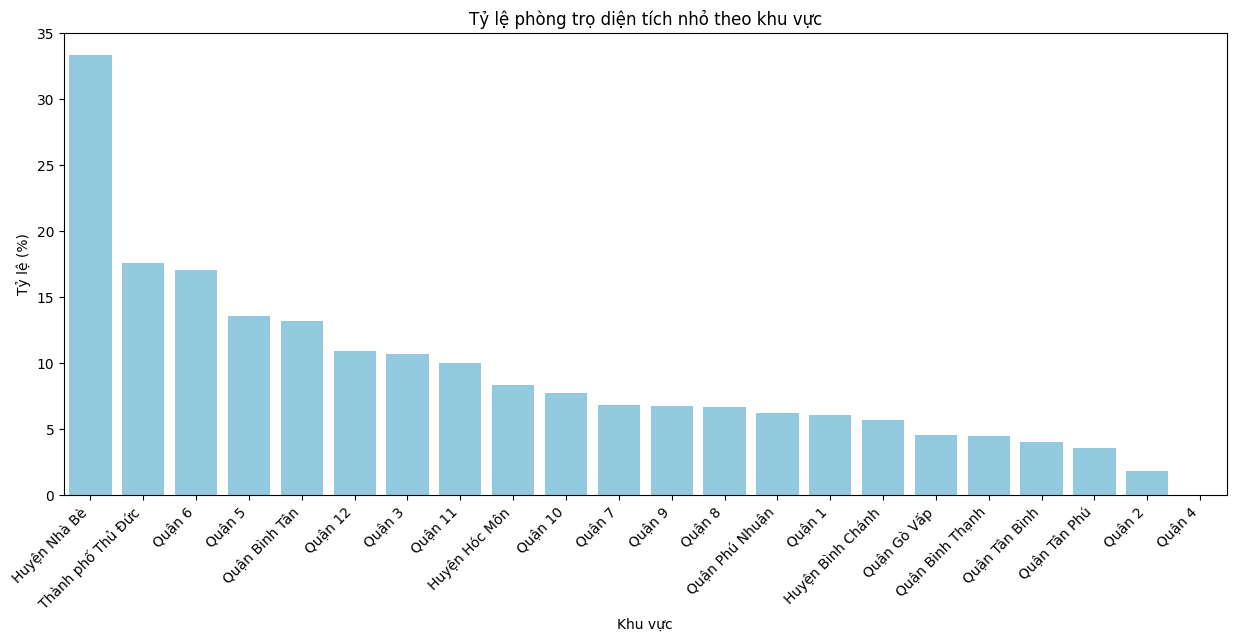

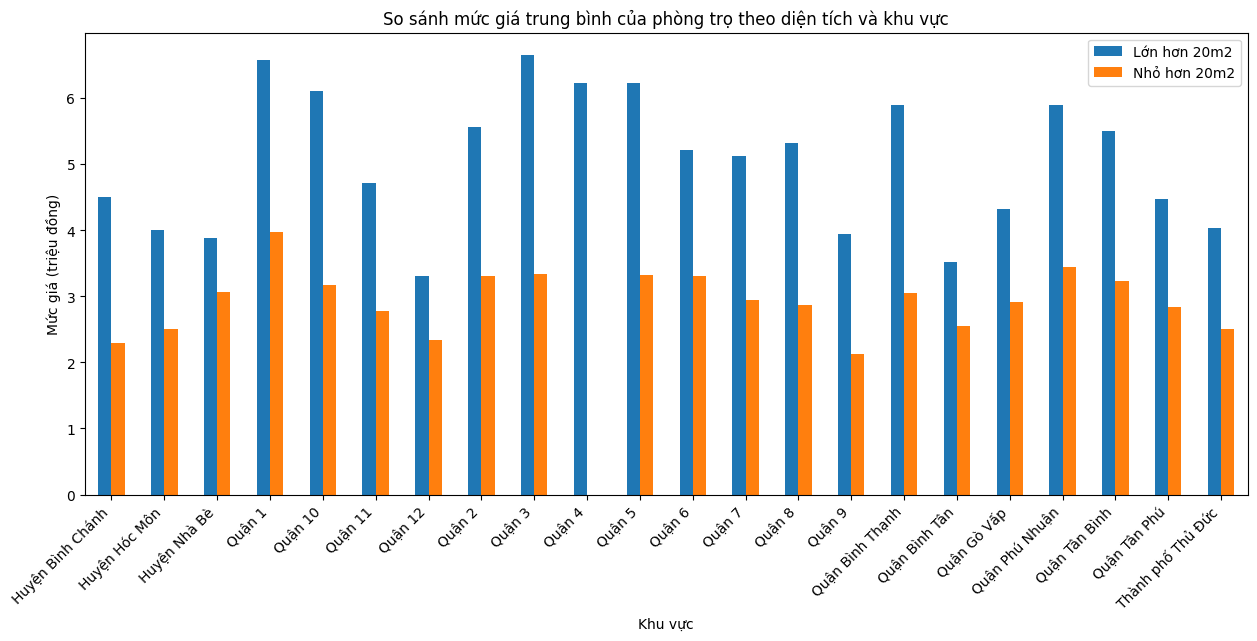

In [11]:
#Tính giá trị trung bình theo nhóm
gia_tb_theo_dien_tich = data_Q2.groupby(['Địa chỉ','La_phong_tro_dien_tich_nho'])['Mức giá'].mean().unstack()
ty_le_phong_tro_S_nho= data_Q2.groupby('Địa chỉ')['La_phong_tro_dien_tich_nho'].mean() * 100
ty_le_phong_tro_S_nho = ty_le_phong_tro_S_nho.sort_values(ascending=False)

# Biểu đồ 1: Tỷ lệ phòng trọ diện tích nhỏ theo khu vực
plt.figure(figsize=(15, 6))
ty_le_phong_tro_S_nho
sns.barplot(x=ty_le_phong_tro_S_nho.index, y=ty_le_phong_tro_S_nho.values, color='skyblue')
plt.title("Tỷ lệ phòng trọ diện tích nhỏ theo khu vực")
plt.xlabel("Khu vực")
plt.ylabel("Tỷ lệ (%)")
plt.xticks(rotation=45, ha='right')
plt.show()

#Biểu đồ 2: So sánh mức giá trung bình của phòng trọ diện tích nhỏ và lớn theo khu vực
gia_tb_theo_dien_tich.plot(kind='bar', figsize=(15,6))
plt.title("So sánh mức giá trung bình của phòng trọ theo diện tích và khu vực")
plt.xlabel("Khu vực")
plt.ylabel("Mức giá (triệu đồng)")
plt.xticks(rotation=45, ha='right')
plt.legend(['Lớn hơn 20m2','Nhỏ hơn 20m2']) 
plt.show()

Từ biều đồ 1 chúng ta có thể thấy tỷ lệ phòng trọ diện tích nhỏ phân bố theo khu vực:
- Các khu vực Nhà Bè, Thủ Đức , quận 5 và quận 6 có tỷ lệ phòng trọ diện tích nhỏ cao hơn hẳn so với các khu vực khác vì:
    + Thành phố Thủ Đức và Nhà Bè: Phần lớn người thuê trọ ở đây là sinh viên, công nhân, người lao động có thu nhập thấp, ưu tiên thuê phòng có dện tích nhỏ giá rẻ. Nhu cầu thuê trọ giá rẻ, gần nơi làm việc tăng cao, dẫn đến việc các chủ nhà trọ tận dụng tối đa diện tích để xây dựng nhiều phòng, thu lợi nhuận.

    + Quận 5 và Quận 6: Đây là hai quận có lịch sử lâu đời, tập trung đông người Hoa sinh sống. Kiến trúc nhà ở ở đây thường là các nhà phố kiểu cũ, được chia nhỏ để cho thuê, tạo thành các phòng trọ có diện tích hạn chế.
- Những khu vực nội thành như Quận 2, Quận 4, Bình Thạnh, Tân Bình và Tân Phú có tỷ lệ phòng trọ diện tích nhỏ thấp bởi vì đây là các khu vực Vị trí trung tâm hoặc gần trung tâm, bên cạnh nhà trọ các quận này còn có nhiều loại hình nhà ở khác như căn hộ chung cư, nhà nguyên căn, nhà cho thuê nguyên căn... điều này tạo ra sự cạnh tranh và người thuê có nhiều sự lựa chọn hơn, ít bị phụ thuộc vào các phòng trọ nhỏ. Và điều này cũng phản ánh xu hướng các phòng trọ tại đây thường có diện tích lớn hơn do giá thuê mặt bằng cao khiến chủ nhà ưu tiên xây dựng phòng lớn hơn hoặc cho thuê mặt bằng kinh doanh.


Từ biểu đồ 2 ta có thể thấy:
- Tương tự như phòng trọ có diện tích nhỏ, đối với phòng trọ có diện tích lớn các vùng ven và ngoại thành thường có giá thấp hơn khu vực nội thành.
- Giá trung bình của phòng nhỏ chỉ bằng 50% đến 60% với phòng vừa và lớn. Thay vì thuê phòng trọ nhỏ thì ta có thể thuê phòng trọ lớn tìm kiếm bạn phòng rồi chia tiền thì sẽ tiết kiệm được chi phí lại còn có thể có một môi trường, cơ sở vật chất tốt hơn.


#### Kết luận


Qua phân tích dữ liệu, chúng ta thấy rõ sự phân hóa về tỷ lệ phòng trọ diện tích nhỏ giữa các khu vực tại Thành phố Hồ Chí Minh. Các khu vực ngoại thành và một số quận nội thành có lịch sử lâu đời thường có tỷ lệ phòng trọ diện tích nhỏ cao hơn. Điều này có thể giải thích bởi các yếu tố như:
- Quy hoạch đô thị: Các khu vực ngoại thành và các quận có lịch sử lâu đời thường chưa có quy hoạch đô thị đồng bộ, dẫn đến việc xây dựng các phòng trọ nhỏ lẻ, tự phát.
- Giá cả mặt bằng: Ở các khu vực trung tâm, giá thuê mặt bằng cao nên các chủ nhà thường ưu tiên xây dựng các phòng trọ có diện tích lớn hơn để tối ưu hóa lợi nhuận.
- Nhu cầu của người thuê: Ở các khu vực ngoại thành, người thuê thường có nhu cầu thuê phòng trọ với chi phí thấp, vì vậy phòng trọ diện tích nhỏ đáp ứng được nhu cầu này.

Ngoài ra chúng ta cũng thấy được sự chênh lệch giữa trung bình giá phòng nhỏ và phòng lớn giữa các khu vực. Điều này giúp người thuê có được sự lựa chọn tối ưu nhất có thể.